<center>
  <h3>
    Aziz ul Haq <br>
    Data Science Task 1 <br>
    Submitted to CodeAlpha
  </h3>
</center>

## 

### Task 1: Iris Flower Classification
### Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load Dataset

In [4]:
df = pd.read_csv(r"E:\Programming\Project\Code Alpha Internship\Data\Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Step 3: Separate Features (X) and Target (y)

In [5]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

- X = input features (4 measurements of each flower).

- y = label/target (species: setosa, versicolor, virginica).

### Step 4: Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

- Divides data into 80% training and 20% testing.

- random_state=42 makes results reproducible.

- stratify=y ensures equal distribution of flower classes in train/test.

### Step 5: Scale Features

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- ML models work better when data is on the same scale.

- fit_transform() learns scaling factors from train set and applies them.

- transform() applies the same scaling to test set (without learning again).

### Step 6: Train the Model

In [8]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

- Creates a Logistic Regression model.

- max_iter=500 ensures enough iterations for convergence.

- .fit() trains the model using training data.

### Step 7: Make Predictions

In [9]:
y_pred = model.predict(X_test_scaled)

- Uses the trained model to predict species for unseen test data.

### Step 8: Evaluate the Model

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



- Accuracy = percentage of correct predictions.

- Classification Report = precision, recall, F1-score for each class.

### Step 9: Confusion Matrix

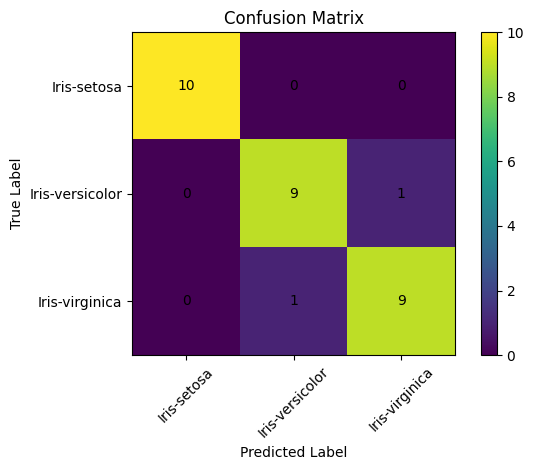

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(model.classes_))
plt.xticks(tick_marks, model.classes_, rotation=45)
plt.yticks(tick_marks, model.classes_)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

- Confusion Matrix shows correct vs. incorrect predictions per class.

- Diagonal = correct predictions. Off-diagonal = mistakes.

- Visualization helps understand where the model gets confused.